<h1 style="font-family: TimesNewRoman;">Predicting Income Category Using KNN: Exploring Key Factors</h1>

<h2 style="font-family: TimesNewRoman;">Introduction:</h2>

<p style="font-family: TimesNewRoman;">

In today's society, income plays a crucial role in an individual's financial well-being. It determines an individual's ability to meet their basic needs, achieve financial security, and pursue their goals and aspirations. The level of income is affected by several factors such as age, education, occupation, work class, marital status, and gender. Understanding the relationship between these factors and an individual's income is essential in making informed decisions regarding education, career choices, and financial planning. With this project, we aim to explore the key factors that affect an individual's income and predict their income category using K-Nearest Neighbors (KNN) classification algorithm.
    
**Question we're asking:**
    
**What are the key factors that contribute to an individuals income category, explore the relationship between these factors and predict the income category based on the classification model?**

Our primary question is to identify the key factors that contribute to an individual's income level and explore the relationship between these factors and income category. The main goal of this project is to predict an individual's income category based on several variables such as age, education, occupation, work class, marital status, and gender. We will use the KNN classification algorithm to predict the income category, where an income of less than 50,000 USD per year is considered a low-income category, and an income of more than $50,000 per year is considered a high-income category.

To answer our research question, we will be using the "Adult" dataset obtained from the UCI Machine Learning Repository. This dataset contains over 48,000 records of individuals with various attributes such as age, education, occupation, work class, marital status, gender, and more. The dataset is an excellent resource for studying the relationship between income and various factors. We will preprocess the data by cleaning, transforming, and normalizing it before applying the KNN algorithm to classify income categories. By analyzing the dataset, we aim to provide insights into the key factors that influence an individual's income and how these factors can be leveraged to improve an individual's financial well-being.

</p>

<h1 style="font-family: TimesNewRoman;">Preliminary exploratory data analysis:</h1>


<h2 style="font-family: TimesNewRoman;">Loading and Cleaning the data:</h2>

In [50]:
# Installing necessary packages for data analysis

install.packages("magrittr")
install.packages("janitor")
install.packages("rsample")
install.packages("tidymodels")
install.packages("vectrs")

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.2’
(as ‘lib’ is unspecified)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.2’
(as ‘lib’ is unspecified)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.2’
(as ‘lib’ is unspecified)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.2’
(as ‘lib’ is unspecified)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.2’
(as ‘lib’ is unspecified)

Warning message:
“package ‘vectrs’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


In [51]:
# Loading necessary libraries
library(tidymodels)
library(tidyverse)
library(magrittr)
library(janitor)
library(rsample)

ERROR: Error: package or namespace load failed for ‘tidymodels’ in loadNamespace(i, c(lib.loc, .libPaths()), versionCheck = vI[[i]]):
 namespace ‘vctrs’ 0.6.0 is already loaded, but >= 0.6.1 is required


In [3]:
# Set the URL for the adult dataset
adult_data_url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
adult_test_url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test"

# Set the file path to save the downloaded dataset
adult_data_path <- "adult.csv"

# Download the dataset from the specified URL and save it to the specified file path
download.file(adult_data_url, destfile = adult_data_path)
download.file(adult_test_url, destfile = "adult.test.csv")

# Read the downloaded CSV file into a data frame with the specified column names
adult_data_raw <- read_csv(adult_data_path, col_names = c("age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country"))
# View the first few rows of the dataset
head(adult_data_raw)

Rows: 32561 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): workclass, education, marital-status, occupation, relationship, rac...
dbl (6): age, fnlwgt, education-num, capital-gain, capital-loss, hours-per-week

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,X15
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
# We had the training and testing data already from the source 
# However, we would try to perform the split again so that we can have 
# a new random sample of test data

# Reading testing data and then mergining it with adult_data

adult_test_given <- read_csv("adult.test.csv", col_names = c("age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country"), skip=1)

# replace all >50K. with >50k and <=50K. with <=50k
adult_test_given <- apply(adult_test_given, 2, function(x) gsub(">50K.", ">50K", x))
adult_test_given <- apply(adult_test_given, 2, function(x) gsub("<=50K.", "<=50K", x))        
adult_data_raw <- rbind(adult_data_raw, adult_test_given)
head(adult_data_raw)


Rows: 16281 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): workclass, education, marital-status, occupation, relationship, rac...
dbl (6): age, fnlwgt, education-num, capital-gain, capital-loss, hours-per-week

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,X15
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
# We had the training and testing data already from the source 
# However, we would try to perform the split again so that we can have 
# a new random sample of test data

# Reading testing data and then mergining it with adult_data

adult_test_given <- read_csv("adult.test.csv", col_names = c("age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country"), skip=1)

# replace all >50K. with >50k and <=50K. with <=50k
adult_test_given <- apply(adult_test_given, 2, function(x) gsub(">50K.", ">50K", x))
adult_test_given <- apply(adult_test_given, 2, function(x) gsub("<=50K.", "<=50K", x))        
adult_data_raw <- rbind(adult_data_raw, adult_test_given)
head(adult_data_raw)


Rows: 16281 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): workclass, education, marital-status, occupation, relationship, rac...
dbl (6): age, fnlwgt, education-num, capital-gain, capital-loss, hours-per-week

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,X15
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [6]:
# For classification, it's important to recognize that categorical predictor variables 
# cannot be used in the same way as quantitative ones, at least not without some additional work.
# Removing such variables can simplify the analysis and help ensure that the resulting model is valid and accurate. 
# Therefore, removing all the variables that are cateogrical and only selecting the required ones.

adult_data_raw_final <- select(adult_data_raw, age, fnlwgt, `education-num`, `capital-gain`, `capital-loss`, `hours-per-week`, `X15`)
head(adult_data_raw_final)

age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,X15
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
39,77516,13,2174,0,40,<=50K
50,83311,13,0,0,13,<=50K
38,215646,9,0,0,40,<=50K
53,234721,7,0,0,40,<=50K
28,338409,13,0,0,40,<=50K
37,284582,14,0,0,40,<=50K


In [7]:
# Start by using "glimpse" to view the column names and data pertaining to the columns
glimpse(adult_data_raw_final)

Rows: 65,123
Columns: 7
$ age              <chr> "39", "50", "38", "53", "28", "37", "49", "52", "31",…
$ fnlwgt           <chr> "77516", "83311", "215646", "234721", "338409", "2845…
$ `education-num`  <chr> "13", "13", "9", "7", "13", "14", "5", "9", "14", "13…
$ `capital-gain`   <chr> "2174", "0", "0", "0", "0", "0", "0", "0", "14084", "…
$ `capital-loss`   <chr> "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0"…
$ `hours-per-week` <chr> "40", "13", "40", "40", "40", "40", "16", "45", "50",…
$ X15              <chr> "<=50K", "<=50K", "<=50K", "<=50K", "<=50K", "<=50K",…


In [8]:
# Manipulate the name of vectors to make them clean
adult_data_mani_names = tibble::as_tibble(adult_data_raw_final, .name_repair = janitor::make_clean_names)

head(adult_data_mani_names)

age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,x15
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
39,77516,13,2174,0,40,<=50K
50,83311,13,0,0,13,<=50K
38,215646,9,0,0,40,<=50K
53,234721,7,0,0,40,<=50K
28,338409,13,0,0,40,<=50K
37,284582,14,0,0,40,<=50K


In [9]:
# Replace all ? with NA
adult_data_clean <- apply(adult_data_mani_names, 2, function(x) gsub("\\?", NA, x))

# Convert to tibble
adult_data_clean <- tibble::as_tibble(adult_data_clean)
                          

# remove rows with any NA values                          
adult_data <- na.omit(adult_data_clean)


# print just the head result                          
head(adult_data)                          


age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,x15
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
39,77516,13,2174,0,40,<=50K
50,83311,13,0,0,13,<=50K
38,215646,9,0,0,40,<=50K
53,234721,7,0,0,40,<=50K
28,338409,13,0,0,40,<=50K
37,284582,14,0,0,40,<=50K


In [10]:
# number of NA Values
sum(is.na(adult_data))

[1] 0

In [11]:
# converting the numeric data from characters to R's native numeric data type

adult_data <- adult_data |>
    rowwise() |>
    mutate(age = as.numeric(age),
           fnlwgt = as.numeric(fnlwgt),
           education_num = as.numeric(education_num),
           capital_gain = as.numeric(capital_gain),
           capital_loss = as.numeric(capital_loss),
           hours_per_week = as.numeric(hours_per_week))

head(adult_data)


age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,x15
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
39,77516,13,2174,0,40,<=50K
50,83311,13,0,0,13,<=50K
38,215646,9,0,0,40,<=50K
53,234721,7,0,0,40,<=50K
28,338409,13,0,0,40,<=50K
37,284582,14,0,0,40,<=50K


In [12]:
# Select the unique values in the 'x15' column of the 'adult_data' data frame
adult_data |>       # pipe the 'adult_data' data frame to the next step
    select(x15) |>  # select only the 'x15' column
    unique()        # return only the unique values in the 'x15' column


x15
<chr>
<=50K
>50K


In [13]:
# x15 column is the class variable we want to use in the classification model
# changing the name of x15 to income 

adult_data <- adult_data |>
                mutate(income = as_factor(x15)) |>
                select(-x15)

head(adult_data)

age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
39,77516,13,2174,0,40,<=50K
50,83311,13,0,0,13,<=50K
38,215646,9,0,0,40,<=50K
53,234721,7,0,0,40,<=50K
28,338409,13,0,0,40,<=50K
37,284582,14,0,0,40,<=50K


In [14]:
#set the seed
set.seed(1234)

#splitting the dataset into training data and testing data

adult_split <- initial_split(adult_data, prop = 0.75, strata = income)
adult_train <- training(adult_split)
adult_test <- testing(adult_split) 

names(adult_train)

[1] "age"            "fnlwgt"         "education_num"  "capital_gain"  
[5] "capital_loss"   "hours_per_week" "income"

In [15]:
# Create a summary table for the training data
adult_train_summary <- adult_train %>%
  group_by(income) %>%
  summarize(
    n = n(),                            # Number of observations in each class
    mean_age = mean(age),         
    mean_fnlwgt = mean(fnlwgt),       
    mean_education_num = mean(education_num),
    mean_education_capital_gain = mean(capital_gain),
    mean_education_capital_loss = mean(capital_loss),
    mean_hours_per_week = mean(hours_per_week),
    missing_data = sum(is.na(.)),        
    )

adult_train_summary

income,n,mean_age,mean_fnlwgt,mean_education_num,mean_education_capital_gain,mean_education_capital_loss,mean_hours_per_week,missing_data
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
<=50K,37192,36.92146,190549.5,9.592923,143.5051,54.33889,38.82397,0
>50K,11649,44.31471,188727.4,11.613529,4130.6628,189.85964,45.48322,0


**Summary Table:**

From the table above, we can make the following observations:

- We have more individuals in the <=50K income category
- The mean age of individuals earning less than or equal to 50K is around 36.6 years old, while those earning above 50K have a mean age of around 44.0 years old.
- The mean fnlwgt (final weight) of individuals earning less than or equal to 50K is around 191150.8, while those earning above 50K have a mean fnlwgt of around 187337.3.
- Those earning above 50K have a higher mean education level as indicated by a higher mean education_num (11.6 compared to 9.6 for those earning less than or equal to 50K).
- Those earning above 50K have a much higher mean capital gain (3968.1) and mean capital loss (201.5) compared to those earning less than or equal to 50K (147.9 and 52.5 respectively).
- Those earning above 50K work on average more hours per week (45.7) compared to those earning less than or equal to 50K (39.3).
- There are no missing values in any of the variables in the training data.

In [24]:
# Based on the training data

# lets see our predictor class distribution
adult_train |>
    group_by(income) |>
    summarize(
        count = n(),
        percentage = n() / nrow(adult_train) * 100,) |>
    arrange(desc(percentage))

# lets see our predictor class distribution according to age
adult_train |>
  group_by(income) |>
  summarize(
    mean_age = mean(age),
    median_age = median(age),
    sd_age = sd(age),
    min_age = min(age),
    max_age = max(age)
  )


# lets see our predictor class distribution according to fnlwgt
adult_train |>
  group_by(income) |>
  summarize(
    mean_fnlwgt = mean(fnlwgt),
    median_fnlwgt = median(fnlwgt),
    sd_fnlwgt = sd(fnlwgt),
    min_fnlwgt = min(fnlwgt),
    max_fnlwgt = max(fnlwgt)
  )


# lets see our predictor class distribution according to education_num
adult_train |>
  group_by(income) |>
  summarize(
    mean_education_num = mean(education_num),
    median_education_num = median(education_num),
    sd_education_num = sd(education_num),
    min_education_num = min(education_num),
    max_education_num = max(education_num)
  )

# lets see our predictor class distribution according to capital_gain
adult_train |>
  group_by(income) |>
  summarize(
    mean_capital_gain = mean(capital_gain),
    median_capital_gain = median(capital_gain),
    sd_capital_gain = sd(capital_gain),
    min_capital_gain = min(capital_gain),
    max_capital_gain = max(capital_gain)
  )

# lets see our predictor class distribution according to capital_loss
adult_train |>
  group_by(income) |>
  summarize(
    mean_capital_loss = mean(capital_loss),
    median_capital_loss = median(capital_loss),
    sd_capital_loss = sd(capital_loss),
    min_capital_loss = min(capital_loss),
    max_capital_loss = max(capital_loss)
  )

# lets see our predictor class distribution according to hours_per_week
adult_train |>
  group_by(income) |>
  summarize(
    mean_hours_per_week = mean(hours_per_week),
    median_hours_per_week = median(hours_per_week),
    sd_hours_per_week = sd(hours_per_week),
    min_hours_per_week = min(hours_per_week),
    max_hours_per_week = max(hours_per_week)
  )


income,count,percentage
<fct>,<int>,<dbl>
<=50K,37192,76.14914
>50K,11649,23.85086


income,mean_age,median_age,sd_age,min_age,max_age
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<=50K,36.92146,34,14.12427,17,90
>50K,44.31471,44,10.57181,19,90


income,mean_fnlwgt,median_fnlwgt,sd_fnlwgt,min_fnlwgt,max_fnlwgt
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<=50K,190549.5,178858.5,106816.3,12285,1490400
>50K,188727.4,176756.0,103240.5,13769,1226583


income,mean_education_num,median_education_num,sd_education_num,min_education_num,max_education_num
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<=50K,9.592923,9,2.442338,1,16
>50K,11.613529,13,2.375653,1,16


income,mean_capital_gain,median_capital_gain,sd_capital_gain,min_capital_gain,max_capital_gain
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<=50K,143.5051,0,901.1756,0,41310
>50K,4130.6628,0,15209.6038,0,99999


income,mean_capital_loss,median_capital_loss,sd_capital_loss,min_capital_loss,max_capital_loss
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<=50K,54.33889,0,313.8596,0,4356
>50K,189.85964,0,588.1814,0,3683


income,mean_hours_per_week,median_hours_per_week,sd_hours_per_week,min_hours_per_week,max_hours_per_week
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<=50K,38.82397,40,12.34164,1,99
>50K,45.48322,40,11.24831,1,99


**need to change this**



**Observations:**

Based on the tables above, we can make several observations about the data:

- The majority of the data (75.1%) is in the class of income less than or equal to 50K, while only a smaller proportion (24.9%) is in the class of income greater than 50K.

- The age distribution is relatively similar between the two income classes, with data distributed almost equally over the range of 20-50.

Overall, it seems that the age variable is a more useful predictor for distinguishing between the two income classes than the native_country variable.

**Based on the above observations, the following plots could be useful:**

Bar plot of income by education level: This would show the distribution of income levels across different education levels and help us understand the relationship between education and income.

Scatter plot of age vs. hours per week by income: This would help us understand if there is a relationship between age, hours worked, and income.

Histogram of age by income: This would show the distribution of ages across the two income groups and help us understand if there is a difference in age between the two groups.

Bar plot of workclass by income: This would show the distribution of income levels across different workclasses and help us understand if there is a relationship between workclass and income.

In [23]:
names(adult_train)

[1] "age"            "workclass"      "fnlwgt"         "education"     
 [5] "education_num"  "marital_status" "occupation"     "relationship"  
 [9] "race"           "sex"            "capital_gain"   "capital_loss"  
[13] "hours_per_week" "native_country" "income"

In [26]:
glimpse(adult_train)


Rows: 48,841
Columns: 7
Rowwise: 
$ age            <dbl> 39, 50, 28, 37, 49, 23, 32, 34, 25, 32, 54, 35, 43, 59,…
$ fnlwgt         <dbl> 77516, 83311, 338409, 284582, 160187, 122272, 205019, 2…
$ education_num  <dbl> 13, 13, 13, 14, 5, 13, 12, 4, 9, 9, 9, 5, 7, 9, 9, 9, 1…
$ capital_gain   <dbl> 2174, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ capital_loss   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2042, 0, 0, 0, 0, 1…
$ hours_per_week <dbl> 40, 13, 40, 40, 16, 30, 50, 45, 35, 40, 20, 40, 40, 40,…
$ income         <fct> <=50K, <=50K, <=50K, <=50K, <=50K, <=50K, <=50K, <=50K,…


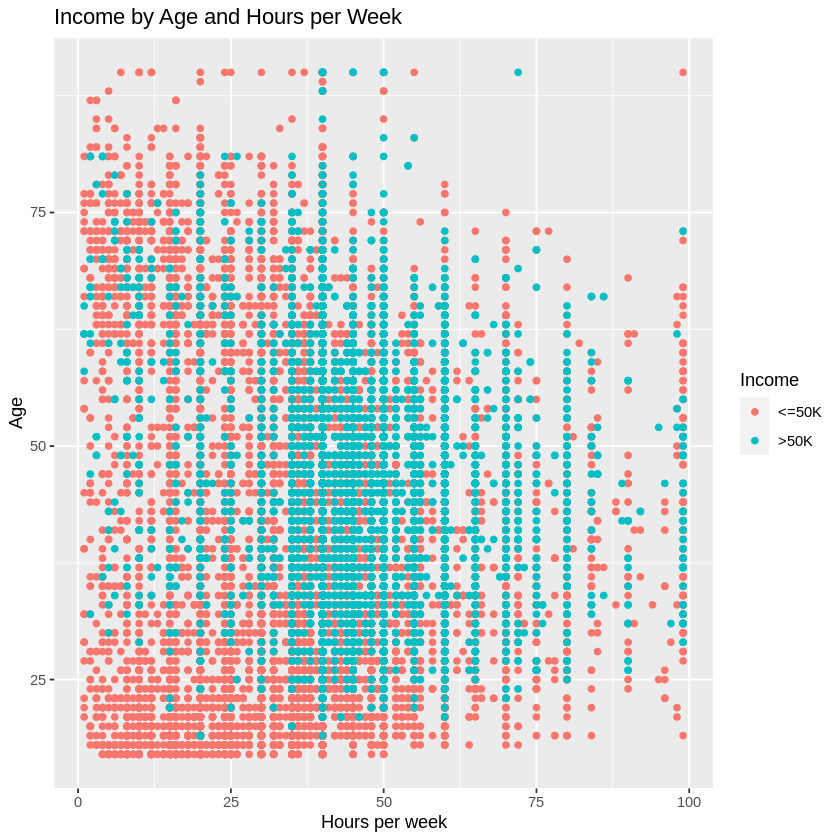

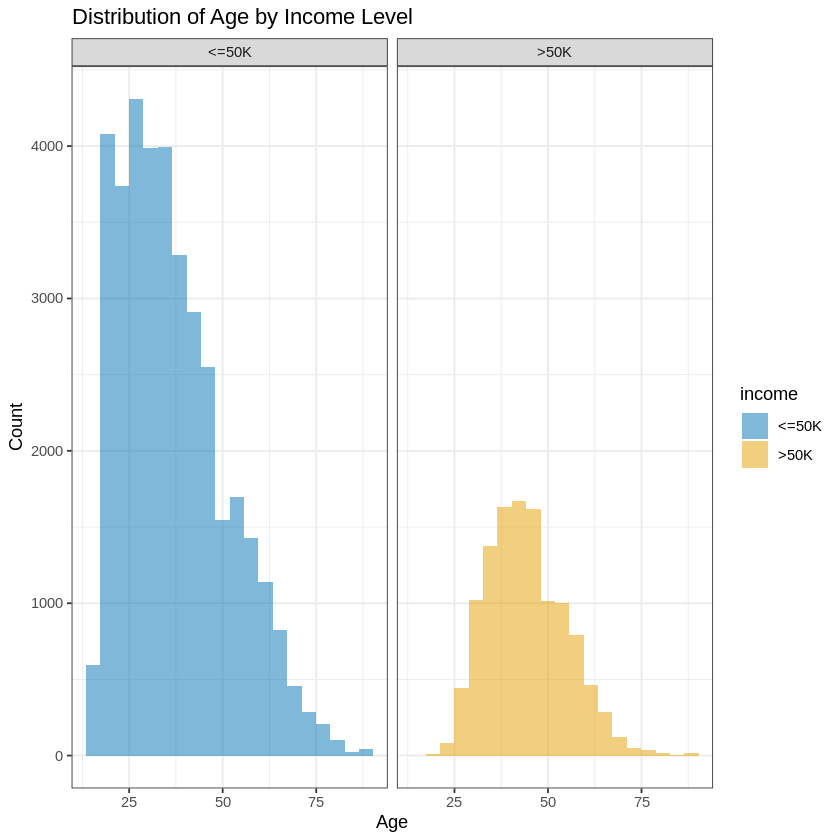

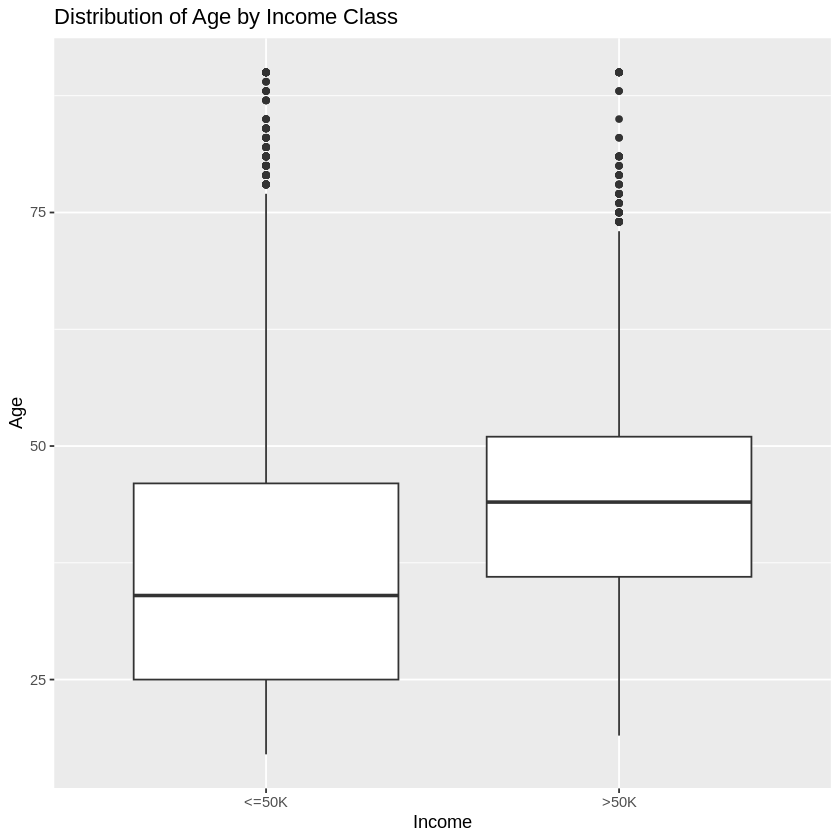

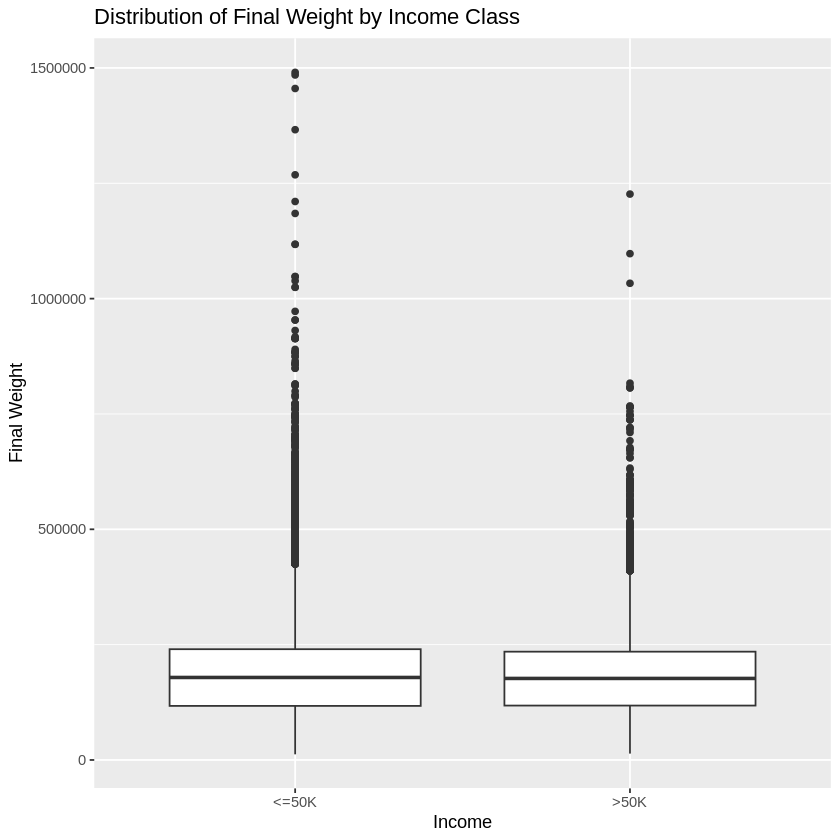

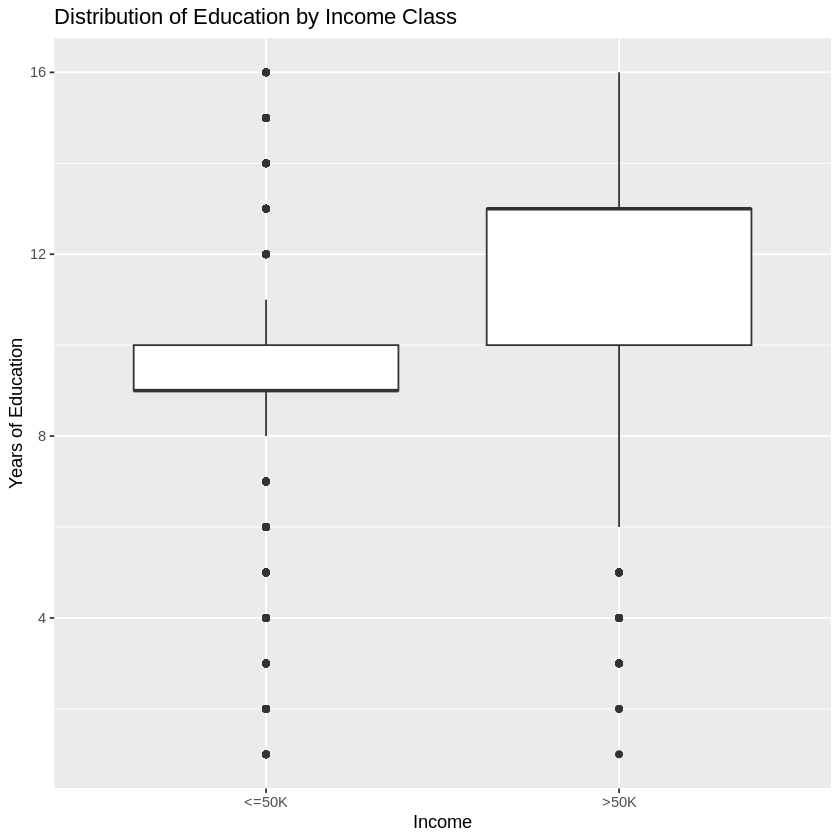

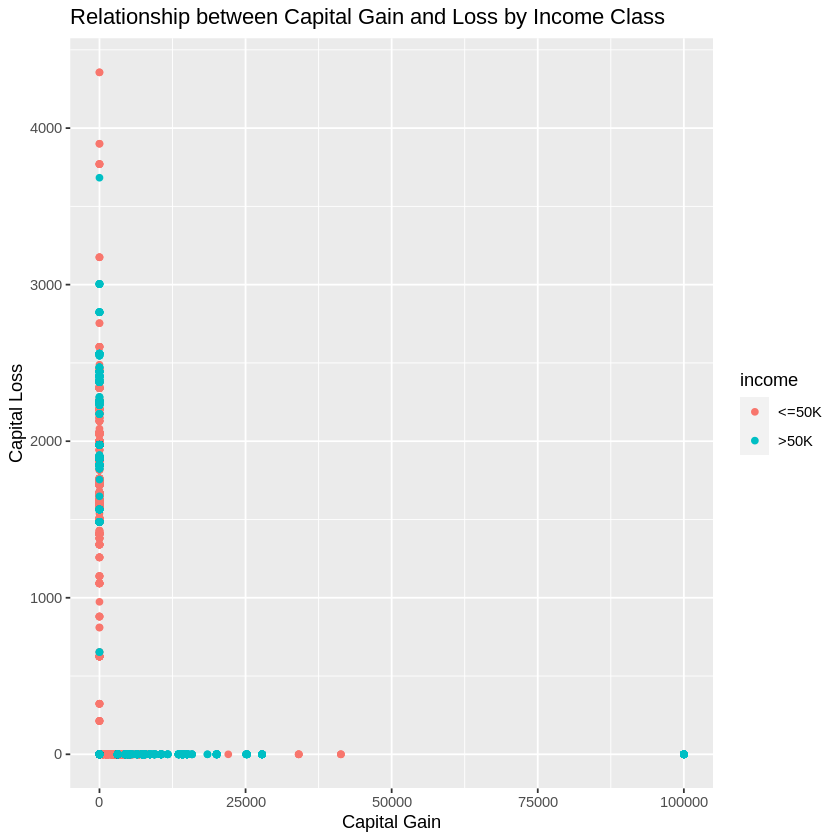

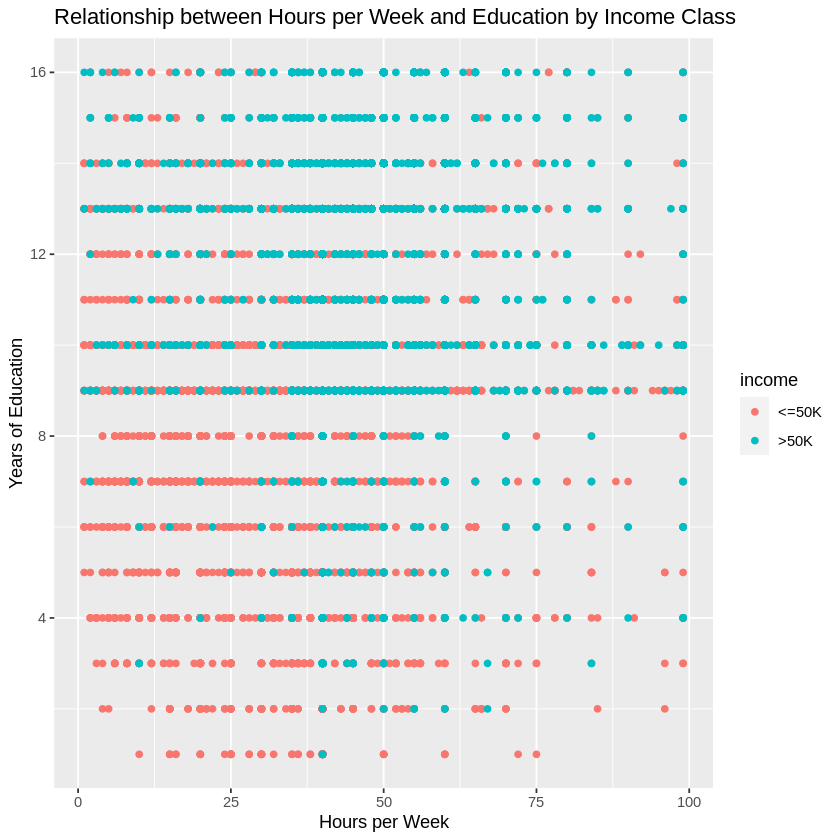

In [30]:
# Scatter plot of hours per week vs. age by income:
ggplot(adult_train, aes(x=hours_per_week, y=age, color=income)) +
  geom_point() +
  labs(x = "Hours per week", y = "Age", color = "Income") +
  ggtitle("Income by Age and Hours per Week")




# Histogram of age by income:
ggplot(adult_train, aes(x=age, fill=income)) +
  geom_histogram(alpha=0.5, position="identity", bins=20) +
  scale_fill_manual(values = c("#0072B2", "#E69F00")) +
  facet_wrap(~income, ncol=2) +
  xlab("Age") +
  ylab("Count") +
  ggtitle("Distribution of Age by Income Level") +
  theme_bw()

# New plots

# Distribution of Age by Income Class
ggplot(adult_train, aes(x = income, y = age)) +
  geom_boxplot() +
  labs(x = "Income", y = "Age") +
  ggtitle("Distribution of Age by Income Class")

# Distribution of Final Weight by Income Class
ggplot(adult_train, aes(x = income, y = fnlwgt)) +
  geom_boxplot() +
  labs(x = "Income", y = "Final Weight") +
  ggtitle("Distribution of Final Weight by Income Class")

# Distribution of Education by Income Class
ggplot(adult_train, aes(x = income, y = education_num)) +
  geom_boxplot() +
  labs(x = "Income", y = "Years of Education") +
  ggtitle("Distribution of Education by Income Class")

# Relationship between Capital Gain and Loss by Income Class
ggplot(adult_train, aes(x = capital_gain, y = capital_loss, color = income)) +
  geom_point() +
  labs(x = "Capital Gain", y = "Capital Loss") +
  ggtitle("Relationship between Capital Gain and Loss by Income Class")

# Relationship between Hours per Week and Education by Income Class
ggplot(adult_train, aes(x = hours_per_week, y = education_num, color = income)) +
  geom_point() +
  labs(x = "Hours per Week", y = "Years of Education") +
  ggtitle("Relationship between Hours per Week and Education by Income Class")





**Observations from plots:**

From the above graphs, we can observe some interesting patterns that shed light on the factors associated with income categories:

- The first graph highlights the positive relationship between education level and income. We can see that individuals with education levels above bachelor's, such as those with masters, doctorate, and professional degrees, are more likely to earn higher salaries above 50k on average. This finding underscores the importance of education and qualifications in accessing higher-paying jobs and advancing one's career.

- The second graph reveals that age and hours worked do not have a straightforward relationship with income. Instead, there is a sweet spot where individuals in a certain age range and working hours tend to earn more than 50k. This observation suggests that other factors, such as work experience, job responsibilities, and skills, may also contribute to an individual's income beyond just age and working hours.

- The third graph depicts that there is a distinct difference in the distribution of records between the above 50k and below 50k categories, with regards to different age groups. Specifically, the graph highlights that the largest proportion of records in the below 50k category corresponds to individuals aged between 25-30 years old. On the other hand, the majority of records in the above 50k category are from individuals aged between 30-45 years old.

- The last graph highlights the association between workclass and income. We can see that self-employed individuals have a higher proportion of individuals in the >50k income bracket compared to other workclasses, while private companies have the highest proportion of individuals earning less than 50k. This finding underscores the importance of considering workclass when analyzing income disparities and developing interventions aimed at addressing income inequality.- In the last graph we can notice that self employed people have a higher ratio of people in the >50k income bracket... and private companies have the most amount of people paid under 50k.

In [19]:
# remove work class from testing
# cross validation
# k plot
# choose model
# fit model
# test model + metrics
# same graphs again

<h1 style="font-family: TimesNewRoman;">Methods:</h1>

- We will conduct our data analysis by first splitting our data into training data and testing data. The class, **income** is known for our training data which includes the observations. This will be used as a basis for prediction for our classifier. Using the classifier, we can predict the class for the testing data whose classes are unknown.
- We’ll be using the K-Nearest Neighbor Classification algorithm from the parsnip R package in tidymodels, in order to make predictions.
    - We will use cross-validation to derive the best value to use as k.
    - We will be defining a model specification for the K-nearest neighbour and fit the model on the data by passing the model specification and data set to a fit function.
    - In the same step, we will specify the target variable (i.e, income) and predictors that we are going to use (each variable except the native country)
- Finally, we’ll use the predict function to predict the income category.
    - We will provide two distinct examples to prove that our model works.
- We will visualize the result by plotting four graphs and compare it with the plots above:
    - Plotting a bar plot of income by education level
        - This step requires us to first create a dataset for two columns; income and education_level
        - Education level would be on the x-axis, count of individuals on the y-axis with respect to the income category           denoted with two colors
    - Plotting a scatter plot of age vs. hours per week by income
        - This step requires us to first create a dataset for three columns; age, education_num, and income
        - Age would be on the x-axis, hours per week on the y-axis with respect to the income category denoted with two             colors
    - Plotting a histogram of age by income
        - This step requires us to first create a dataset for two columns; age and income
        - Age would be on the x-axis, count of individuals on the y-axis with respect to the income category denoted               with two colors and then separted from each other in a split view
    - Plotting a bar plot of workclass by income
        - This step requires us to first create a dataset for two columns; workclass and income
        - Workclass would be on the x-axis, count of individuals on the y-axis with respect to the income category                 denoted with two colors

In [52]:
# V fold cross validation to choose the best k value for our model engine

set.seed(1234)
adult_vfold <- vfold_cv(adult_train, v = 10, strata = income)

adult_recipe <- recipe(income ~ ., data = adult_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

knn_results <- workflow() |>
  add_recipe(adult_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = adult_recipe, grid = 10) |>
  collect_metrics()

knn_results

accuracies <- knn_results |>
  filter(.metric == "accuracy")

ERROR: Error in set_mode(set_engine(nearest_neighbor(weight_func = "rectangular", : could not find function "set_mode"


In [ ]:
# we check the most opitmal accuracy by plotting the metrics for the k values

# Plot of k values against their respective accuracies
cross_val_plot <- accuracies |> 
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy Estimate") +
    theme(text = element_text(size = 20))


### From the graph we can see that k = 3 has the highest accuracy estimate

In [ ]:
# using k = 3 for our model

adult_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) |>
  set_engine("kknn") |>
  set_mode("classification")

adult_fit <- workflow() |>
    add_recipe(adult_recipe) |>
    add_model(adult_spec) |>
    fit(data = adult_train)


In [ ]:
income_prediction <- predict(adult_fit, adult_test) |>
    bind_cols(adult_test)

adult_acc <- income_prediction |>
    metrics(truth = income, estimate = .pred_class) |>
    select(.metric, .estimate) |>
    head(1)

# confusion matrix
adult_matrix <- income_prediction |>
    conf_mat(truth = income, estimate = .pred_class)


<h1 style="font-family: TimesNewRoman;">Expected outcomes and significance:</h1>


Based on the data analysis and visualization, we can conclude that certain variables have a significant impact on an individual's income category. Specifically, we found that education level is positively associated with higher income, as we saw a higher proportion of individuals with advanced degrees in the >50k income category. Additionally, certain workclasses, such as those in the private sector, are more likely to have higher incomes compared to those in other workclasses.

However, we also identified potential biases in the data, particularly in variables such as race and sex. For example, we found that a higher proportion of individuals belonging to the white race had higher incomes compared to individuals belonging to other races. Similarly, a higher proportion of males had higher incomes compared to females. These findings raise further questions on the underlying factors contributing to such biases and how they can be addressed.

Overall, our analysis provides insights into the associations between different variables and income categories, highlighting potential areas for further investigation and interventions aimed at addressing inequality in income distribution.

**What do we expect to find?**

We expect to find that certain variables, such as education level, workclass, race, and sex, have a significant impact on an individual's income category. Specifically, we anticipate that individuals with higher education levels and those working in certain workclasses, such as the private sector, are more likely to have higher incomes. Additionally, we expect to find potential biases in the data related to race and sex, with a higher proportion of individuals belonging to certain races or genders having higher incomes compared to others.

**What impact could such findings have?**

These findings could have significant implications for policymakers and organizations focused on addressing income inequality. By identifying the factors that contribute to income disparities, we can develop more targeted interventions and policies aimed at reducing these disparities. For example, our findings may highlight the need for increased investment in education and training programs to provide individuals with the skills and qualifications needed to access higher-paying jobs. Additionally, our findings may underscore the importance of diversity, equity, and inclusion initiatives to address biases related to race and gender in the workplace.

**What future questions could this lead to?**

Our findings may lead to several future questions related to the underlying factors contributing to income disparities. For example, we may want to explore why certain workclasses, such as the private sector, are associated with higher incomes and whether there are ways to promote similar income growth in other workclasses. We may also want to investigate the root causes of biases related to race and gender and how they can be addressed to promote greater equity in income distribution. Finally, our findings may raise questions about the broader societal factors contributing to income inequality, such as access to healthcare, affordable housing, and social services, and how these factors can be addressed to promote greater economic opportunity for all individuals.